# Continuation: Voorspellende modellen toepassen!
Dit notebook is een kopie van die uit sessie 7, met toevoegingen uit dit college (vanaf hoofdstuk continuation)

In [1]:
import pandas as pd
import random
import numpy as np

### data preparatie

Dit onderste deel is al behandeld in eerdere notebooks (sessie 4), we laden hier alleen de dataset in, hij is al opgeschoond en van het juiste type.

In [2]:
df = pd.read_csv("zoo_animals.csv")
df.head()

,animal_name,age,height,weight,zoo_location
0,Wolf,2,1.23,36,Bronx Zoo
1,Wolf,19,1.07,30,Berlin Zoo
2,Kangaroo,25,1.39,88,San Diego Zoo
3,Rhino,61,3.31,2179,Tokyo Zoo
4,Flamingo,2,1.32,3,Berlin Zoo


ik voeg nu een extra kolom toe met een binaire waarde, zodat we die kunnen voorspellen met een model die een binaire waarde nodig heeft.

In [3]:
df["gender"] = [random.randint(0,1) for _ in range(len(df))]
df["gender"].value_counts()

gender
1    30
0    20
Name: count, dtype: int64

In [4]:
df.head()

,animal_name,age,height,weight,zoo_location,gender
0,Wolf,2,1.23,36,Bronx Zoo,0
1,Wolf,19,1.07,30,Berlin Zoo,1
2,Kangaroo,25,1.39,88,San Diego Zoo,1
3,Rhino,61,3.31,2179,Tokyo Zoo,0
4,Flamingo,2,1.32,3,Berlin Zoo,0


# Modellen trainen
Ik weet op het moment van schrijven nog niet welk model we gaan trainen, dit bepalen we gedurende de sessie.

In [5]:
# pip install scikit-learn

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# random state zorgt ervoor dat het wel random is, maar de volgende keer dat we dit runnen doen we het weer precies hetzelfde random
train_df, test_val_df = train_test_split(df, test_size=0.4, random_state=42) 
print(train_df.shape)
print(test_val_df.shape)

(30, 6)
(20, 6)


In [8]:
test_df, val_df = train_test_split(test_val_df, test_size=0.5, random_state=42) 
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(30, 6)
(10, 6)
(10, 6)


In [9]:
model = DecisionTreeClassifier(random_state=42)
model.fit(
    X=train_df[["age", "height", "weight"]], 
    y=train_df["gender"]
)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
test_prediction_y = model.predict(X=test_df[["age", "height", "weight"]]) # predict only on X, y will be returned
print(test_prediction_y)
print(np.array(test_df["gender"]))

[0 1 0 1 0 1 1 0 1 1]
[1 1 0 1 1 1 1 1 0 1]


In [11]:
accuracy_score(
    y_true=test_df["gender"], 
    y_pred=test_prediction_y
)

0.6

In [12]:
model.get_depth() # kijk hoe diep deze boom is om te kijken welke waardes we willen proberen

10

In [13]:
for max_depth in range(1,8):
    model_tune = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # fit het model
    model_tune.fit(
        X=train_df[["age", "height", "weight"]], 
        y=train_df["gender"]
    )
    
    # test het model
    test_prediction_y_tune = model_tune.predict(
        X=test_df[["age", "height", "weight"]]
    )

    # bereken de accuracy
    score = accuracy_score(
        y_true=test_df["gender"], 
        y_pred=test_prediction_y_tune
    )
    
    print(f"Model met max_depth van {max_depth}, heeft een accuracy van {score}")

Model met max_depth van 1, heeft een accuracy van 0.6
Model met max_depth van 2, heeft een accuracy van 0.6
Model met max_depth van 3, heeft een accuracy van 0.6
Model met max_depth van 4, heeft een accuracy van 0.6
Model met max_depth van 5, heeft een accuracy van 0.6
Model met max_depth van 6, heeft een accuracy van 0.6
Model met max_depth van 7, heeft een accuracy van 0.6


nu weten we welke max_depth het beste is, en nu kunnen we de validatie dataset toepassen om de resultaten te verwerken in het rapport

In [14]:
model = DecisionTreeClassifier(max_depth=1, random_state=42)
# fit het model
model.fit(
    X=train_df[["age", "height", "weight"]], 
    y=train_df["gender"]
)
# test het model 
val_prediction_y = model.predict(
    X=val_df[["age", "height", "weight"]] # MET DE VALIDATION DATA
)
# bereken de accuracy 
score = accuracy_score(
    y_true=val_df["gender"], 
    y_pred=val_prediction_y # OP DE VALIDATION DATA
)

print(score)

0.6


[Text(0.5, 0.75, 'x[0] <= 6.5\ngini = 0.464\nsamples = 30\nvalue = [11, 19]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.403\nsamples = 25\nvalue = [7.0, 18.0]'),
 Text(0.625, 0.5, '  False')]

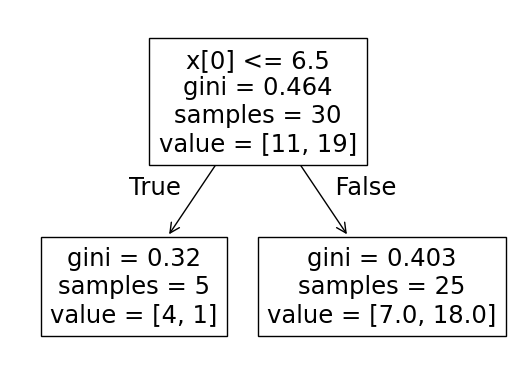

In [15]:
plot_tree(model)

# Continuation
Vanaf hier komt nieuwe stof ten opzichte van sessie 7!

# Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(random_state=42)
# fit het model
model.fit(
    X=train_df[["age", "height", "weight"]], 
    y=train_df["gender"]
)
# test het model 
test_prediction_y = model.predict(
    X=test_df[["age", "height", "weight"]]
)
# bereken de accuracy 
score = accuracy_score(
    y_true=test_df["gender"], 
    y_pred=test_prediction_y
)

print(score)

0.7
